In [8]:
suppressMessages(library(tidyverse))
library(tidyverse)

## Data description

Components: 混凝土材料

1. Cement: 水泥
2. Blast Furnace Slag: BFS, 高爐渣
3. Fly Ash: FlyAsh, 飛灰
4. Water: 水
5. Superplasticizer: SP, 塑化劑
6. Coarse Aggregate: CA, 粗骨材, 粗粒料
7. Fine Aggregate: FA, 细骨料
8. Age: 製造天數

Dependent variable:

1. Concrete compressive strength: CCS, 混凝土抗壓強度

## Load train and test data

In [3]:
load("D:/10702/ASLM/training_prediction_sample.rdata")
load("D:/10702/ASLM/training_prediction_index.rdata")

Rename the data frame.

In [5]:
names(r.model) <- c('Cement', 'BFS', 'FlyAsh', 'Water', 'SP', 'CA', 'FA', 'Age', 'CCS')
names(r.pred) <- c('Cement', 'BFS', 'FlyAsh', 'Water', 'SP', 'CA', 'FA', 'Age', 'CCS')

## Scatter plot matrix

我們先畫出 `水泥`, `高爐渣`, `飛灰`, `水` 及 `製造天數` 的scatter plot

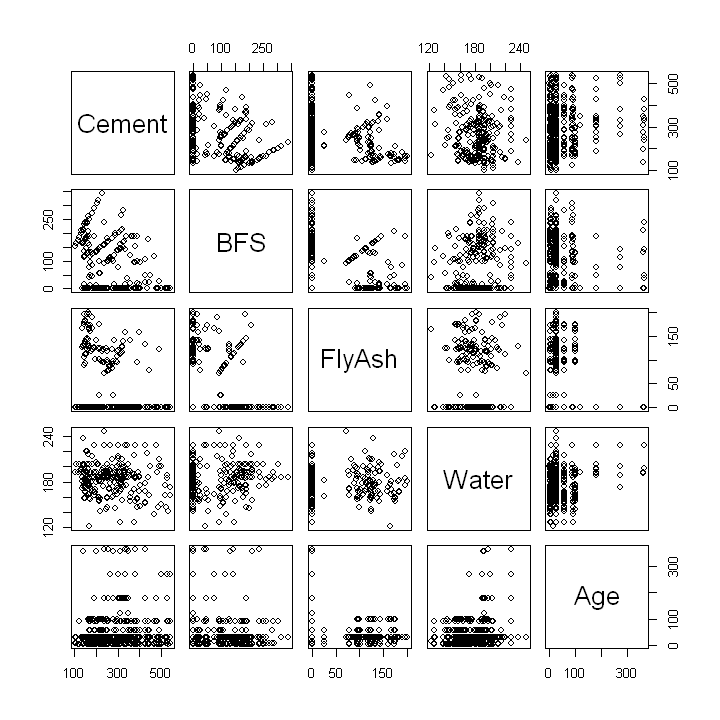

In [55]:
options(repr.plot.width=6, repr.plot.height=6)
# scatter plot matrix
df <- select(r.model, Cement, BFS, FlyAsh, Water, Age, CCS)
pairs(df[1:5])

## Original model

In [23]:
fit <- lm(CCS~ Cement+BFS+FlyAsh+Water+Age, data = df)
summary(fit)


Call:
lm(formula = CCS ~ Cement + BFS + FlyAsh + Water + Age, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-27.5463  -6.7113   0.8617   6.9295  26.9976 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 28.074549   5.083757   5.522 5.34e-08 ***
Cement       0.112254   0.005519  20.340  < 2e-16 ***
BFS          0.098891   0.006614  14.952  < 2e-16 ***
FlyAsh       0.091582   0.009746   9.397  < 2e-16 ***
Water       -0.228054   0.022708 -10.043  < 2e-16 ***
Age          0.110468   0.007345  15.039  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 10.4 on 509 degrees of freedom
Multiple R-squared:  0.6192,	Adjusted R-squared:  0.6154 
F-statistic: 165.5 on 5 and 509 DF,  p-value: < 2.2e-16


## Add interaction term in the model
看二次交互作用項

In [47]:
fit.poly <- lm(CCS ~ Cement + BFS + FlyAsh + Water + Age
               + I(Cement*Cement) + I(BFS*BFS) + I(FlyAsh*FlyAsh) + I(Water*Water) + I(Age*Age)
               + Cement:BFS + Cement:FlyAsh + Cement:Water + Cement:Age
               + BFS:FlyAsh + BFS:Water + BFS:Age
               + FlyAsh:Water + FlyAsh:Age
               + Water:Age, data = df)     # Polynomial model
summary(fit.poly)


Call:
lm(formula = CCS ~ Cement + BFS + FlyAsh + Water + Age + I(Cement * 
    Cement) + I(BFS * BFS) + I(FlyAsh * FlyAsh) + I(Water * Water) + 
    I(Age * Age) + Cement:BFS + Cement:FlyAsh + Cement:Water + 
    Cement:Age + BFS:FlyAsh + BFS:Water + BFS:Age + FlyAsh:Water + 
    FlyAsh:Age + Water:Age, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-21.0440  -4.9668  -0.4359   4.9998  24.5306 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -2.097e+01  3.257e+01  -0.644 0.519934    
Cement              2.785e-01  6.048e-02   4.604 5.27e-06 ***
BFS                 2.083e-01  7.530e-02   2.767 0.005876 ** 
FlyAsh              3.834e-01  1.073e-01   3.572 0.000389 ***
Water              -1.867e-01  2.567e-01  -0.727 0.467291    
Age                 4.247e-01  6.445e-02   6.590 1.13e-10 ***
I(Cement * Cement) -1.222e-04  4.875e-05  -2.506 0.012540 *  
I(BFS * BFS)       -1.229e-04  7.740e-05  -1.588 0.113000    
I(FlyA

## Residual plots 
### Against Y

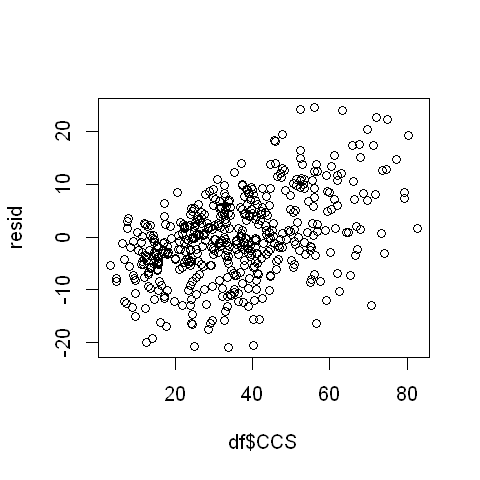

In [54]:
options(repr.plot.width=4, repr.plot.height=4)
resid <- fit.poly$residuals
plot(df$CCS, resid)

### Against $X$ and $X^2$

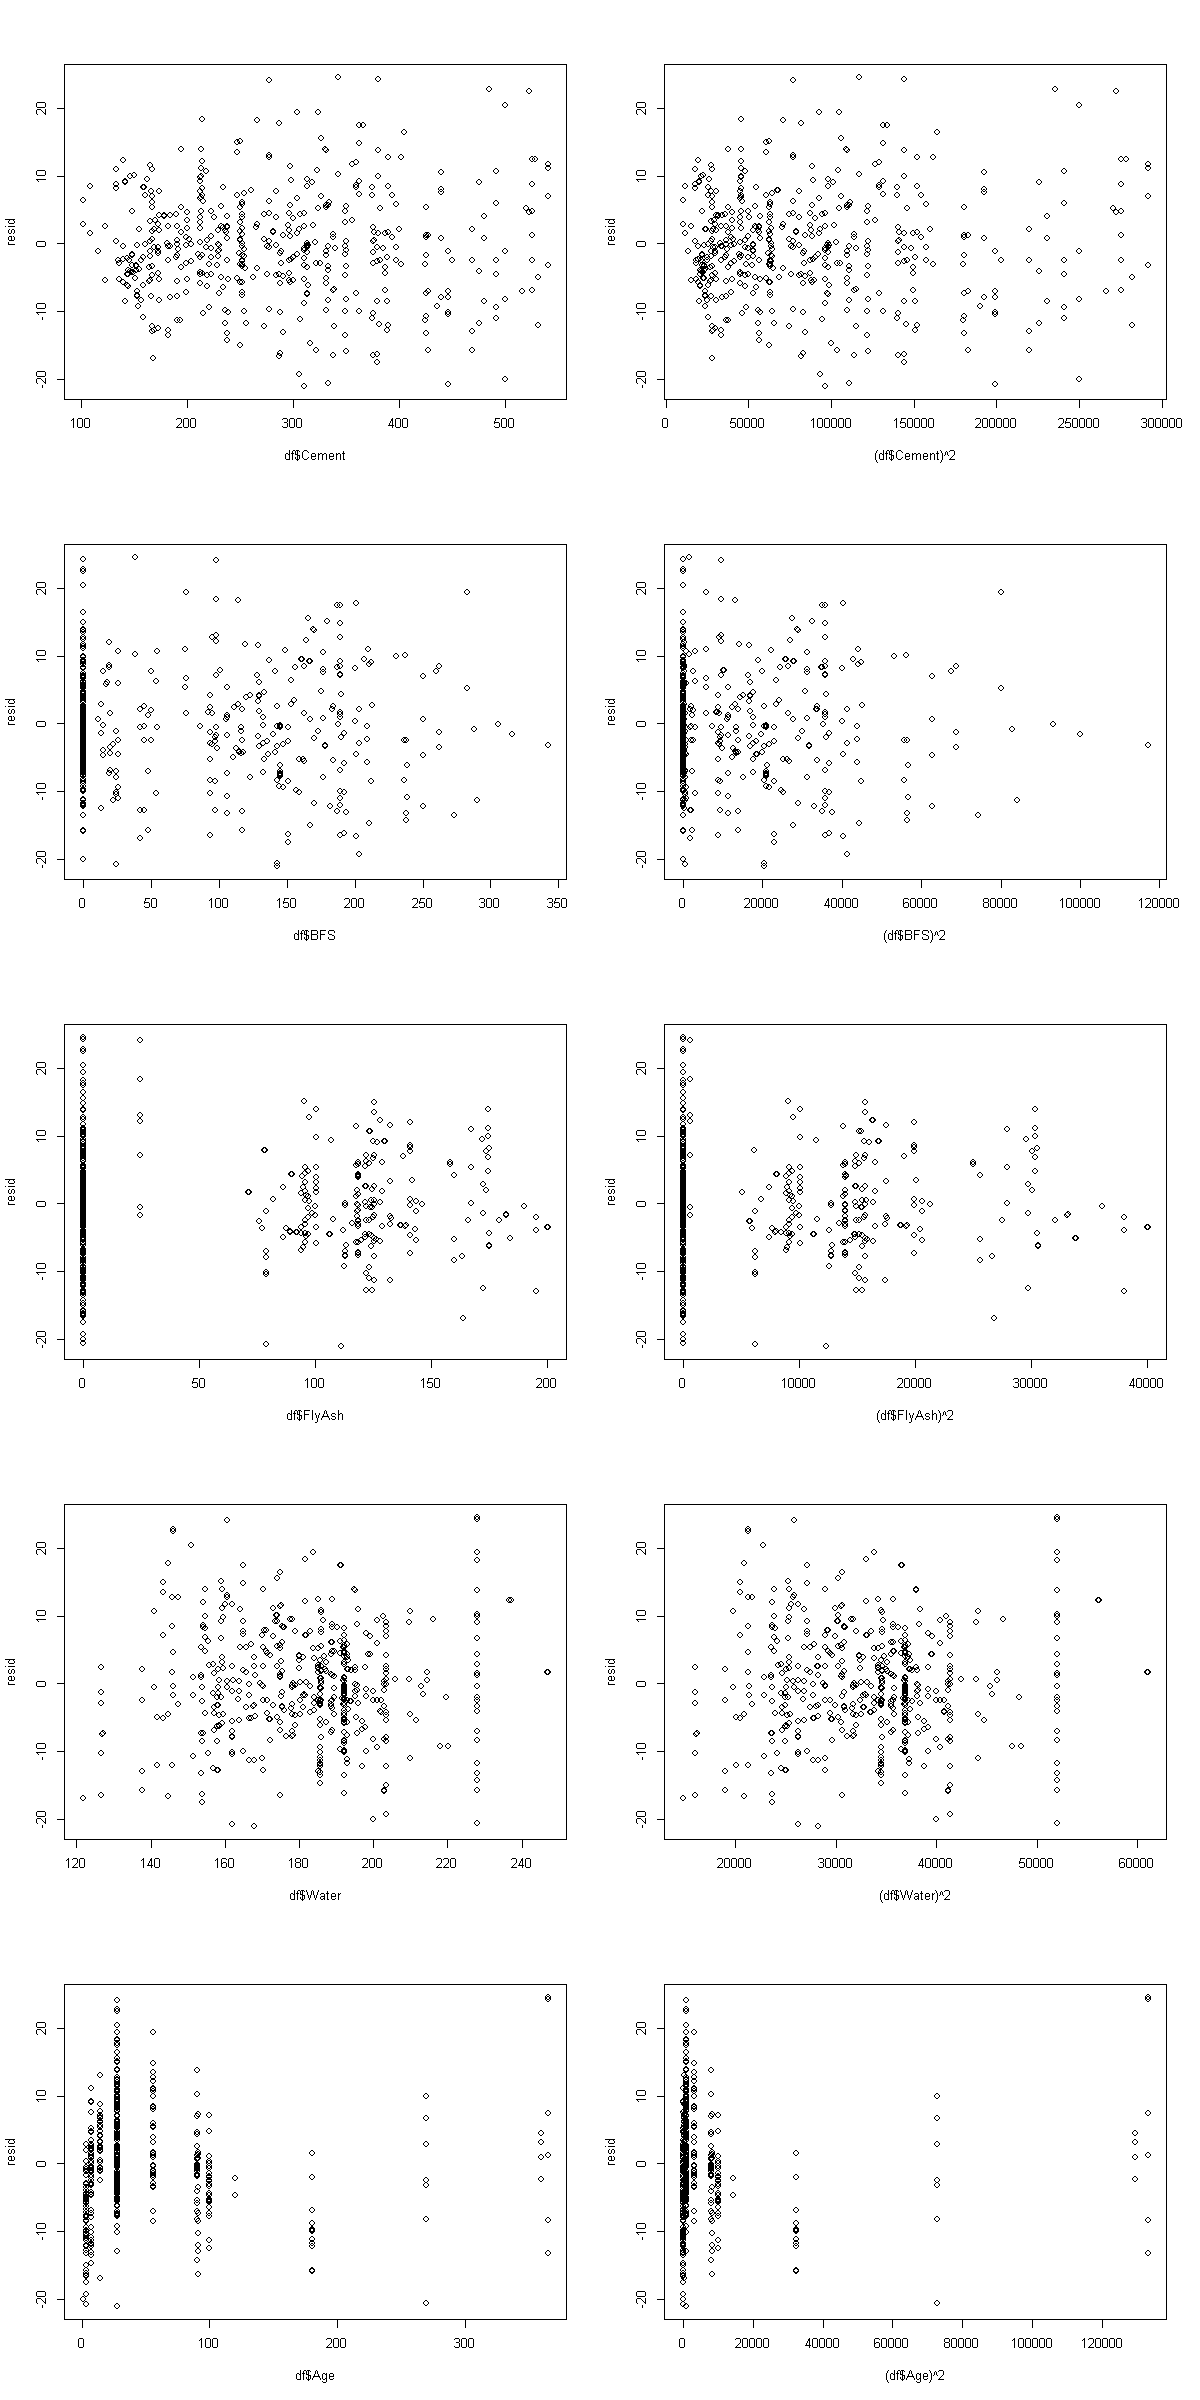

In [51]:
options(repr.plot.width=10, repr.plot.height=20)

par(mfrow=c(5,2))
plot(df$Cement, resid)
plot((df$Cement)^2, resid)

plot(df$BFS, resid)
plot((df$BFS)^2, resid)

plot(df$FlyAsh, resid)
plot((df$FlyAsh)^2, resid)

plot(df$Water, resid)
plot((df$Water)^2, resid)

plot(df$Age, resid)
plot((df$Age)^2, resid)

### Against interaction terms

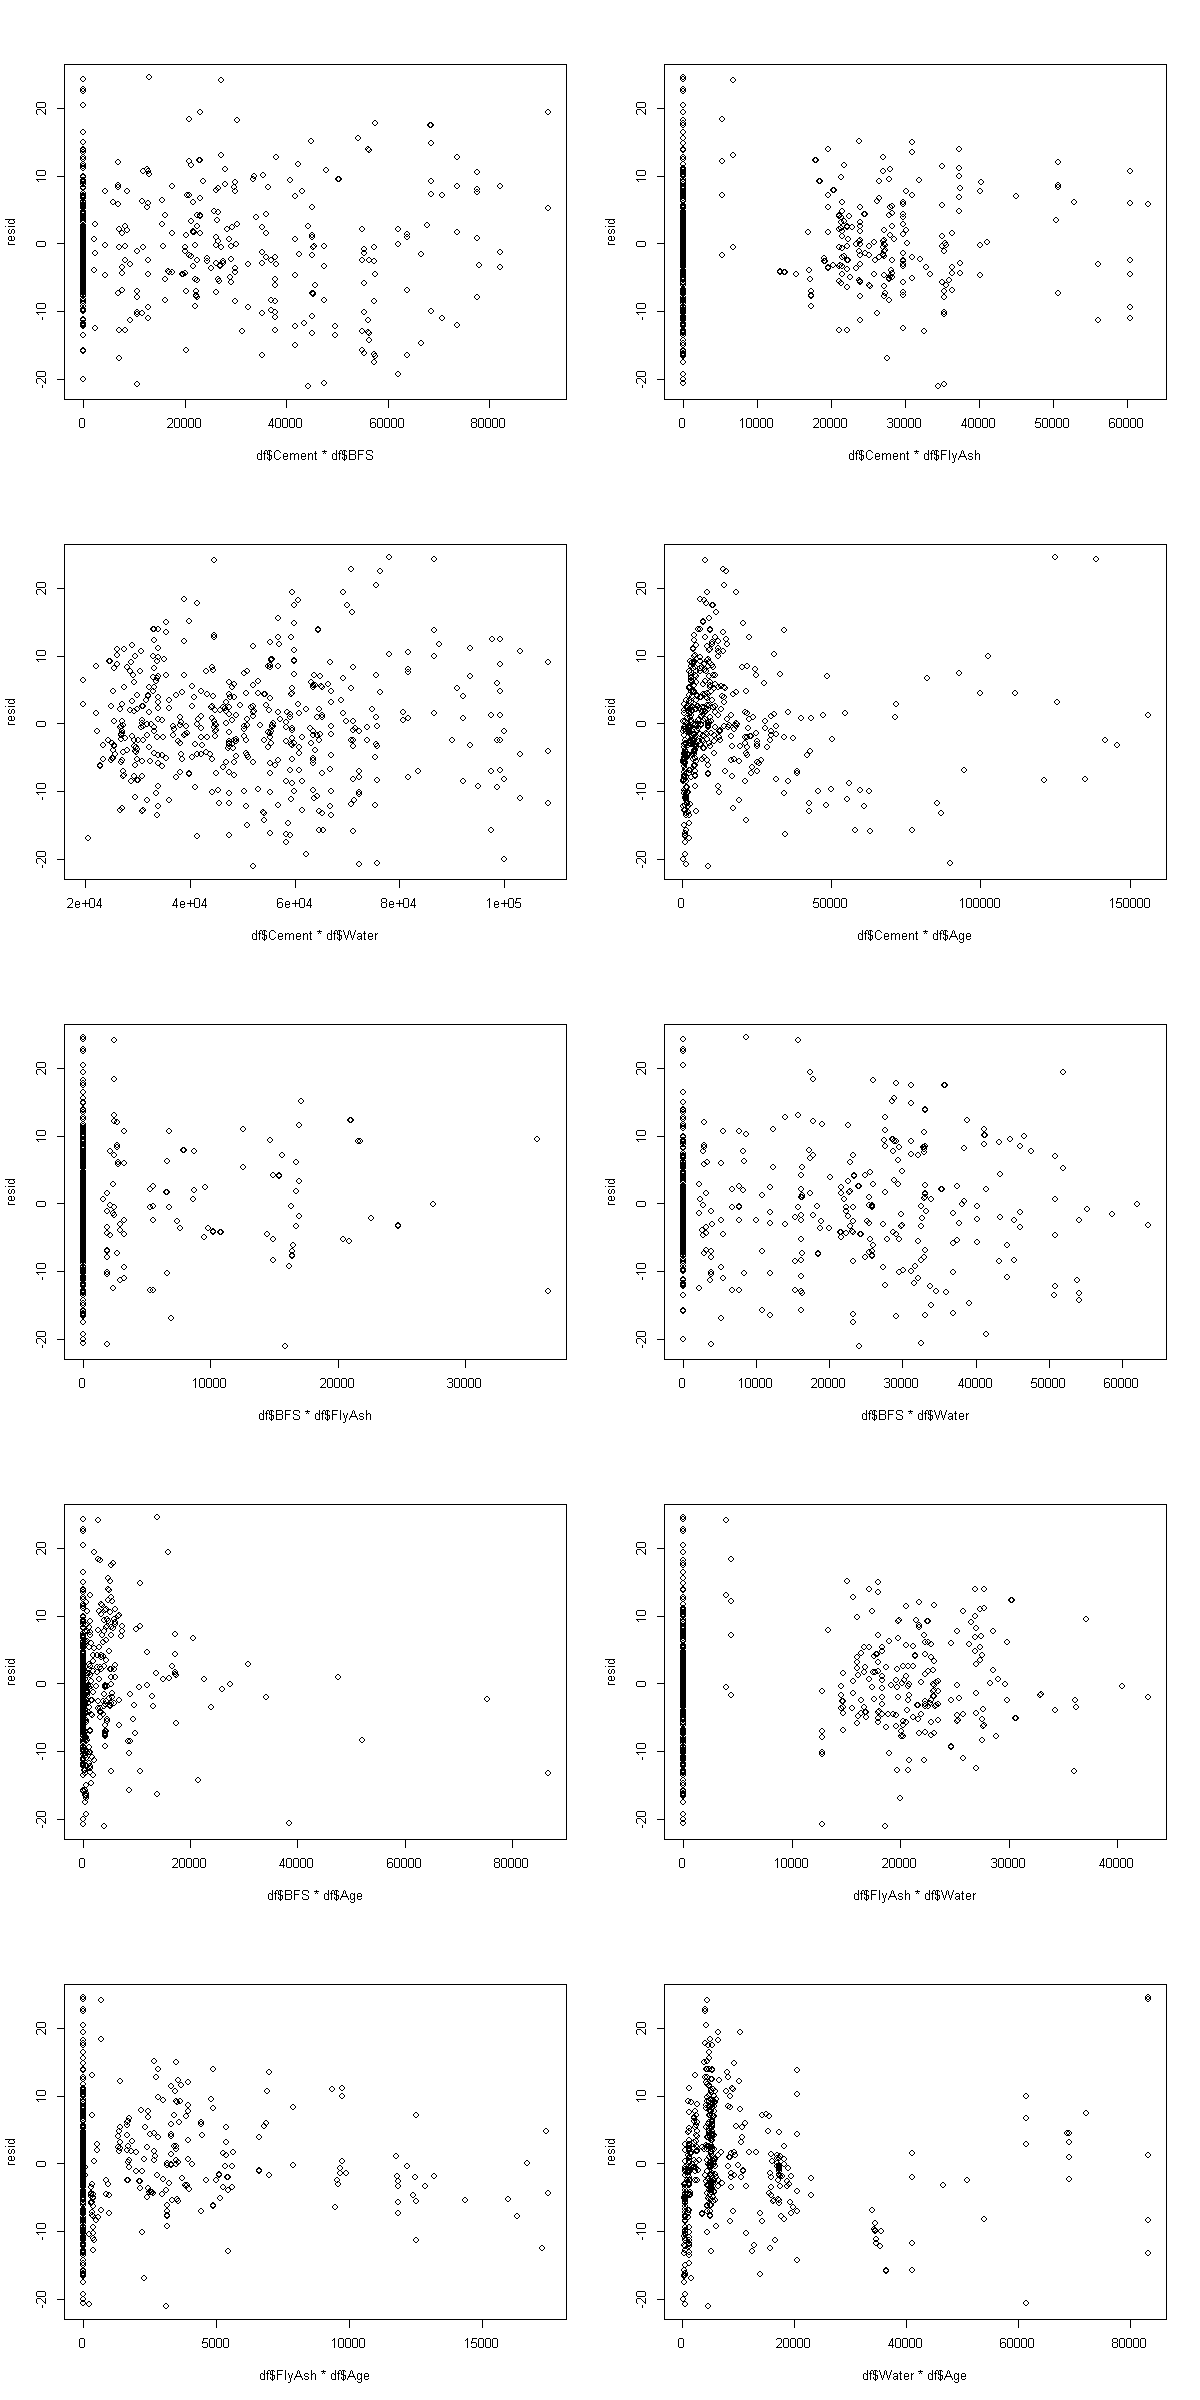

In [57]:
options(repr.plot.width=10, repr.plot.height=20)

par(mfrow=c(5,2))
plot(df$Cement*df$BFS, resid)
plot(df$Cement*df$FlyAsh, resid)
plot(df$Cement*df$Water, resid)
plot(df$Cement*df$Age, resid)
plot(df$BFS*df$FlyAsh, resid)
plot(df$BFS*df$Water, resid)
plot(df$BFS*df$Age, resid)
plot(df$FlyAsh*df$Water, resid)
plot(df$FlyAsh*df$Age, resid)
plot(df$Water*df$Age, resid)

## 挑出重複變量
為了進行 Lack of fit, 先對Y(CCS) 做分類+排序

In [68]:
sort(table(df$CCS)) # 共214組


 3.32  4.83   4.9  6.28   6.9  6.94  7.32   7.4  7.68  7.72  7.84  8.06  8.54 
    1     1     1     1     1     1     1     1     1     1     1     1     1 
 9.01  9.13  9.31  9.45  9.62  9.69  9.73 10.34 10.54 11.39 11.41 11.47 11.58 
    1     1     1     1     1     1     1     1     1     1     1     1     1 
11.65 11.85 11.98 12.05 12.18 12.25 12.37 12.45 12.46 12.47 12.64 12.84 13.09 
    1     1     1     1     1     1     1     1     1     1     1     1     1 
13.12 13.22 13.29 13.54 13.57 13.66 13.71 13.82 14.14  14.2 14.31  14.4 14.54 
    1     1     1     1     1     1     1     1     1     1     1     1     1 
14.59  14.6 14.64 14.99 15.03 15.44 15.52 15.53 15.58 15.62 15.69 15.75 15.82 
    1     1     1     1     1     1     1     1     1     1     1     1     1 
16.11  16.5 16.88 16.89  17.2 17.22 17.28 17.34 17.82 17.95 17.96    18 18.02 
    1     1     1     1     1     1     1     1     1     1     1     1     1 
 18.2 18.91 19.01 19.77 20.59 20.73 20.92 21.07 21.

In [70]:
sort.CCS <- sort(table(df$CCS))
sort.CCS[sort.CCS>2] # 重複超過兩筆


31.35 32.72  33.4 37.43    39  39.3 44.52 23.52 41.05  79.3 
    3     3     3     3     3     3     3     4     4     4 

In [71]:
df[df$CCS==79.3, ]

,Cement,BFS,FlyAsh,Water,Age,CCS
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
180,362.6,189,0,164.9,91,79.3
178,362.6,189,0,164.9,91,79.3
183,362.6,189,0,164.9,91,79.3
176,362.6,189,0,164.9,91,79.3


In [72]:
df[df$CCS==41.05,]

,Cement,BFS,FlyAsh,Water,Age,CCS
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4,332.5,142.5,0,228.0,365,41.05
915,313.0,145.0,0,178.0,28,41.05
978,313.3,145.0,0,178.5,28,41.05
792,349.0,0.0,0,192.0,180,41.05


In [74]:
df[df$CCS==23.52,]

,Cement,BFS,FlyAsh,Water,Age,CCS
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
957,149.0,117.6,91.7,182.9,28,23.52
894,149.0,118.0,92.0,183.0,28,23.52
691,288.0,192.0,0.0,192.0,7,23.52
330,246.8,0.0,125.1,143.3,3,23.52


In [75]:
df[df$CCS==44.52,]

,Cement,BFS,FlyAsh,Water,Age,CCS
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
909,313.0,145.0,0,127.0,28,44.52
523,284.0,15.0,141,179.0,56,44.52
972,312.7,144.7,0,127.3,28,44.52


由於進行 Lack of fit的前提是Y值(CCS)重複，X有不同level(例如$X_1$,$X_2$,$X_3$,$X_4$皆固定, $X_8$有兩種值)  
由上述可知我們的training data可能無法進行LOF Test 